In [14]:
from dolfin import *
import numpy as np
import matplotlib.pyplot as plt
import torch 
from torch.autograd import grad
from torch.utils.data import DataLoader, Dataset

class Corner_Singularity_2D(Dataset):
    def __init__(self, grid_size=[50, 50], lower_bound_xy=[-1, -1], uper_bound_xy=[1, 1]):
        self.grid_size = grid_size
        self.lower_bound_xy = lower_bound_xy
        self.upper_bound_xy = uper_bound_xy

        self.nb_points_in_omega = 0
        self.nb_points_on_boundary = 0
        self.omega_coordinates, self.boundary_coordinates = self._create_points_in_omega(self.grid_size, self.lower_bound_xy, self.upper_bound_xy)

    def __getitem__(self, index):
        return self.omega_coordinates[index]
    
    def __len__(self):
        return self.nb_points_in_omega

    def _create_points_in_omega(self, grid_size, lower_bound_xy, upper_bound_xy):
        mesh = RectangleMesh(Point(lower_bound_xy[0], lower_bound_xy[1]), Point(upper_bound_xy[0], upper_bound_xy[1]), grid_size[0], grid_size[1])
        mesh_coordinates = mesh.coordinates()

        boundary_mask = [(x, y) for x, y in mesh_coordinates if ((y == 0 and 0 <= x <= 1) or (x == -1) or (x == 1) or (y == -1) or (y == 1))]
        omega_mask = [(x, y) for x, y in mesh_coordinates if not ((y == 0 and 0 <= x <= 1) or (x == -1) or (x == 1) or (y == -1) or (y == 1))]
        boundary_coordinates = np.array(boundary_mask)
        omega_coordinates = np.array(omega_mask)

        self.nb_points_on_boundary = boundary_coordinates.shape[0]
        self.nb_points_in_omega = omega_coordinates.shape[0]

        return omega_coordinates, boundary_coordinates
    
    def plot_domain(self):
        plt.scatter(self.omega_coordinates[:, 0], self.omega_coordinates[:, 1], c='blue', alpha=0.6, label='Omega points')
        plt.scatter(self.boundary_coordinates[:, 0], self.boundary_coordinates[:, 1], c='red', alpha=0.6, label='Boundary points')
        plt.title('Domain with corner singularity along the x-axis at y=0')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()   

In [5]:
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

In [6]:
import sys
import os
import importlib
import numpy as np
sys.path.append(os.path.join(os.getcwd(), 'ModelsNN'))
import recurrent_nn as rnn
importlib.reload(rnn)

model = rnn.RitzModel(2)
total_params = model.nb_params
print(f"Le modèle possède : {total_params} paramètres")

Le modèle possède : 921 paramètres


In [9]:
def u_true(x):
    x, y = x[:, 0], x[:, 1]
    r, theta = cart2pol(x, y)
    return r**(1/2) * np.sin(theta/2)

def f_true(x):
    return 0

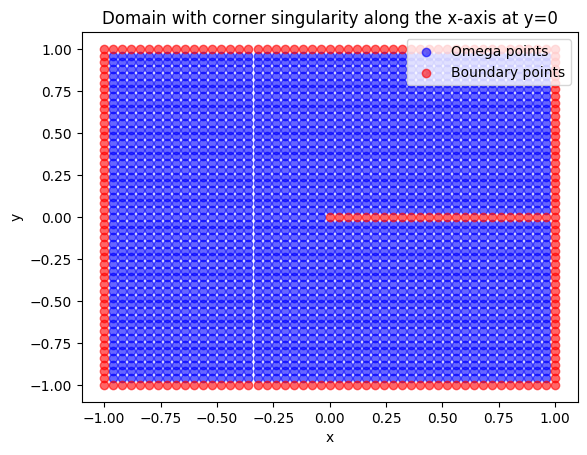

2376 225


In [13]:
# Always check that we have the corner singularity in the domain
omega = Corner_Singularity_2D([50, 50])
omega.plot_domain()
ix_omega = omega.omega_coordinates
ix_boundary = omega.boundary_coordinates